#Import OpenAI SDK

In [15]:
# Install the openai-agents library.
!pip install -q openai-agents

#Import Asyncio to run asynchronus functions

In [16]:
# Apply nest_asyncio to allow nested asynchronous operations, which is useful in environments like Colab.
import nest_asyncio
nest_asyncio.apply()

#Set Gemini API key as Default API reference instaed of Open API key

In [17]:
# Import necessary classes and functions from the agents library and google.colab.
from agents import Agent, Runner, AsyncOpenAI, set_default_openai_client, set_tracing_disabled, set_default_openai_api, OpenAIChatCompletionsModel
from google.colab import userdata

# Get the Gemini API key from Colab's user data secrets.
gemini_api_key = userdata.get('GEMINI_API_KEY')

# Disable tracing for the agents.
set_tracing_disabled(True)
# Set the default OpenAI API to chat_completions.
set_default_openai_api("chat_completions")

# Create an AsyncOpenAI client configured to use the Gemini API endpoint.
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
# Set the external client as the default OpenAI client.
set_default_openai_client(external_client)

# Create an OpenAIChatCompletionsModel instance using the Gemini 2.0 Flash model and the external client.
model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client= external_client
)

#Agent

In [18]:
# Create an Agent named "Assistant" with a simple instruction.
agent1 = Agent(
    name="Assistant",
    instructions="You are a helpful assistant",
    model=model # Assign the configured model to the agent
)

# Run the agent synchronously with a greeting message.
result = Runner.run_sync(
    agent1,
    "hi my name is zeeshan"
)
# Print the final output from the agent.
print("[Output]:",result.final_output)

[Output]: Hello Zeeshan! How can I help you today?



#Tools

In [19]:
# Import the function_tool decorator.
from agents import function_tool # rest of the imports are already done above

# Define a function tool to get the current weather for a city.
@function_tool
def get_current_weather(city:str):
    """Returns Weather for the city

    Args:
        city:city name

    Returns:
        Weather:str"""

    # Return a predefined weather string.
    return f"The weather in {city} is sunny"

# Create a new Agent with the added get_current_weather tool.
agent2 = Agent(
    name="Assistant",
    instructions="You are a helpful assistant",
    model=model, # Assign the configured model to the agent
    tools=[get_current_weather] # Add the weather tool to the agent
)

# Run the agent synchronously with a query about the weather in Karachi.
result = Runner.run_sync(
    agent2,
    "what is the weather in Karachi"
)
# Print the final output from the agent.
print("[Output]:",result.final_output)

[Output]: The weather in Karachi is sunny.



#Handoffs

In [28]:
# Import the function_tool decorator.
from agents import function_tool

# Define a function tool to get the current weather for a city.
@function_tool
def get_current_weather(city:str):
    """Returns Weather for the city

    Args:
        city:city name

    Returns:
        Weather:str"""

    # Return a predefined weather string.
    return f"The weather in {city} is sunny"

# Create a PIAIC Expert Agent with instructions and model.
PIAIC_expert : Agent = Agent(
    name="PIAIC Expert Agent",
    instructions="You are a helpful PIAIC assistant, You answer all questions about Panaversity ",
    model=model,
    handoff_description="Panaversity Expert"
)

# Create an Agentic AI Expert Agent with instructions and model.
AgenticAI_expert : Agent = Agent(
    name="Agentic AI Expert Agent",
    instructions="You are a helpful Agentic AI assistant, You answer all questions about Agentic AI ",
    model=model,
    handoff_description="Agentic AI Expert"
)

# Create a Triage agent with instructions, model, tools, and handoffs to other agents.
triage_agent: Agent = Agent(
    name="Triage",
    instructions="You are general chat assistant, You observe the conversation with the user and let relevant agents answer back to the user",
    model=model,
    tools=[get_current_weather], # Add the weather tool
    handoffs=[PIAIC_expert, AgenticAI_expert] # Define agents for handoff
)

# Run the triage agent with a greeting message and print the output.
result = Runner.run_sync(
    triage_agent,
    "Hi My name is Zeeshan"
)
print(f"[{result.last_agent.name}Output]:",result.final_output)

# Run the triage agent with a weather query and print the output.
result = Runner.run_sync(
    triage_agent,
    "what is the weather in Karachi"
)
print(f"[{result.last_agent.name}Output]:",result.final_output)

# Run the triage agent with a PIAIC related query and print the output.
result = Runner.run_sync(
    triage_agent,
    "Who is the founder of PIAIC"
)
print(f"[{result.last_agent.name}Output]:",result.final_output)

# Run the triage agent with an Agentic AI related query and print the output.
result = Runner.run_sync(
    triage_agent,
    "when was the term 'Agentic AI' first coined"
)
print(f"[{result.last_agent.name}Output]:",result.final_output)

[TriageOutput]: Hello Zeeshan, how can I help you today?

[TriageOutput]: The weather in Karachi is sunny.

[PIAIC Expert AgentOutput]: The founder of PIAIC (Presidential Initiative for Artificial Intelligence & Computing) is Mr. Zia Khan.

[Agentic AI Expert AgentOutput]: Unfortunately, there's no single, definitive answer to when the term "Agentic AI" was first coined and by whom. It's a relatively new and evolving concept, and its usage has emerged gradually. Here's what I can tell you based on my knowledge:

*   **Emergence and Gradual Adoption:** The term "agentic AI" gained traction as AI systems became more autonomous and capable of independent action. Instead of being purely reactive, these systems began to exhibit behaviors like planning, goal-setting, and learning from experience. This shift led to the need for a term to describe this new generation of AI.

*   **Related Concepts:** The ideas behind agentic AI have roots in earlier fields like:

    *   **Multi-Agent Systems 

#Agent Visualization
shows a graphical reprensation of agent heirachy

In [13]:
# Install the visualization extension for openai-agents.
!pip install "openai-agents[viz]"

In [24]:
# Import Agent and function_tool from agents, and draw_graph from the visualization extension.
from agents import Agent, function_tool
from agents.extensions.visualization import draw_graph

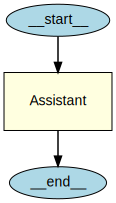

In [25]:
# Draw a graph visualization of agent1.
draw_graph(agent1)

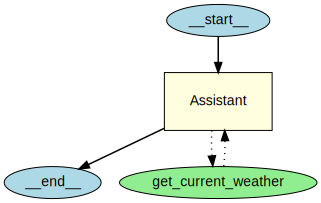

In [26]:
# Draw a graph visualization of agent2.
draw_graph(agent2)

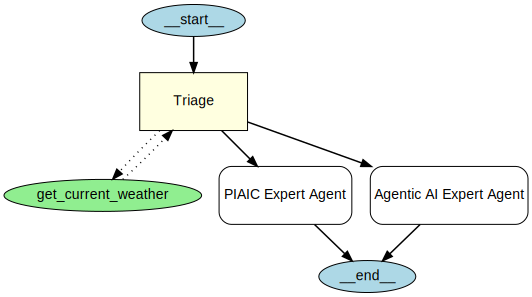

In [29]:
# Draw a graph visualization of the triage_agent.
draw_graph(triage_agent)